In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


**Data cleaning by memory reduction**


In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
train=reduce_mem_usage(pd.read_csv("../input/train.csv"))
test=reduce_mem_usage(pd.read_csv("../input/test.csv"))

Mem. usage decreased to 78.01 Mb (74.7% reduction)
Mem. usage decreased to 77.82 Mb (74.6% reduction)


In [4]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.921875,-6.785156,11.906250,5.093750,11.460938,-9.281250,5.117188,18.625000,-4.921875,5.746094,2.925781,3.181641,14.015625,0.574707,8.796875,14.570312,5.750000,-7.238281,4.285156,30.718750,10.531250,16.218750,2.578125,2.470703,14.382812,13.429688,-5.148438,-0.407227,4.929688,5.996094,-0.308594,12.906250,-3.876953,16.890625,11.195312,10.578125,0.676270,7.886719,...,15.460938,5.312500,3.615234,5.039062,6.675781,12.664062,2.701172,-0.697266,9.601562,5.488281,-4.765625,-8.421875,20.875000,3.152344,18.562500,7.742188,-10.125000,13.726562,-3.519531,1.719727,-8.406250,9.015625,3.066406,14.367188,25.843750,5.875000,11.843750,-19.718750,17.578125,0.585938,4.433594,3.964844,3.136719,1.691406,18.515625,-2.398438,7.878906,8.562500,12.781250,-1.091797
1,train_1,0,11.500000,-4.148438,13.859375,5.390625,12.359375,7.042969,5.621094,16.531250,3.146484,8.085938,-0.403320,8.054688,14.023438,8.414062,5.433594,13.703125,13.828125,-15.585938,7.800781,28.578125,3.427734,2.740234,8.554688,3.371094,6.976562,13.890625,-11.765625,-2.558594,5.046875,0.548340,-9.296875,7.875000,1.286133,19.375000,11.367188,0.739746,2.798828,5.843750,...,29.484375,5.867188,3.820312,15.835938,-5.011719,15.132812,3.201172,9.320312,3.882812,5.800781,5.539062,5.097656,22.031250,5.511719,30.265625,10.500000,-7.234375,16.578125,-7.347656,11.078125,-5.593750,9.484375,-14.906250,9.421875,22.546875,-4.863281,7.656250,-15.929688,13.320312,-0.356689,7.640625,7.722656,2.583984,10.953125,15.429688,2.033203,8.125000,8.789062,18.359375,1.952148
2,train_2,0,8.609375,-2.746094,12.078125,7.894531,10.585938,-9.085938,6.941406,14.617188,-4.917969,5.953125,-0.324951,-11.265625,14.195312,7.312500,7.523438,14.648438,7.679688,-1.739258,4.699219,20.484375,17.750000,18.140625,1.214844,3.513672,5.675781,13.218750,-7.992188,-2.902344,5.847656,6.144531,-11.101562,12.484375,-2.287109,19.046875,11.046875,4.109375,4.699219,6.933594,...,13.203125,5.843750,4.707031,5.714844,-1.041016,20.515625,3.279297,-5.593750,7.316406,5.769531,-7.093750,-3.912109,7.257812,-5.824219,25.687500,10.921875,-0.310303,8.843750,-9.703125,2.400391,-4.292969,9.390625,-13.265625,3.154297,23.093750,-5.300781,5.375000,-6.265625,10.195312,-0.841797,2.906250,9.789062,1.669922,1.685547,21.609375,3.142578,-6.519531,8.265625,14.718750,0.396484
3,train_3,0,11.062500,-2.152344,8.953125,7.195312,12.585938,-1.835938,5.843750,14.921875,-5.859375,8.242188,2.306641,2.810547,13.843750,11.968750,6.457031,14.835938,10.742188,-0.429932,15.945312,13.726562,20.296875,12.554688,6.820312,2.722656,12.132812,13.734375,0.813477,-0.905762,5.906250,2.839844,-15.242188,10.437500,-2.572266,6.179688,10.609375,-5.914062,8.171875,2.851562,...,31.890625,5.968750,7.207031,3.890625,-11.085938,17.250000,2.587891,-2.701172,0.563965,5.343750,-7.152344,-6.191406,18.234375,11.710938,14.750000,8.101562,11.875000,13.953125,-10.468750,5.695312,-3.753906,8.414062,1.898438,7.261719,-0.463867,-0.049805,7.933594,-12.828125,12.414062,1.848633,4.464844,4.742188,0.717773,1.421875,23.031250,-1.270508,-2.927734,10.289062,17.968750,-9.000000
4,train_4,0,9.835938,-1.483398,12.875000,6.636719,12.273438,2.449219,5.941406,19.250000,6.265625,7.679688,-9.445312,-12.140625,13.851562,7.890625,7.789062,15.054688,8.484375,-3.068359,6.527344,11.312500,21.421875,18.953125,10.109375,2.714844,14.210938,13.546875,3.173828,-3.341797,5.902344,7.933594,-3.158203,9.468750,-0.008301,19.328125,12.406250,0.

In [5]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.284424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.142090,NaN,NaN,NaN,NaN
std,0.300653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,0.000000,0.408447,-15.046875,2.117188,-0.040192,5.074219,-32.562500,2.347656,5.351562,-10.507812,3.970703,-20.734375,-26.093750,13.437500,-6.011719,1.013672,13.078125,0.635254,-33.375000,-10.664062,-12.406250,-5.433594,-10.085938,-5.324219,1.209961,-0.678223,12.718750,-24.250000,-6.167969,2.089844,-4.789062,-34.812500,2.140625,-8.984375,1.508789,9.820312,-16.515625,-8.093750,-1.183594,-6.335938,...,-7.453125,4.851562,0.623047,-6.531250,-20.000000,3.816406,1.851562,-35.968750,-5.250000,4.257812,-14.507812,-22.484375,-11.453125,-22.750000,-2.996094,3.242188,-29.109375,4.953125,-29.265625,-7.855469,-22.031250,5.417969,-26.000000,-4.808594,-18.484375,-22.578125,-3.021484,-47.750000,4.414062,-2.554688,-14.093750,-2.691406,-3.814453,-11.781250,8.695312,-5.261719,-14.210938,5.960938,6.300781,-38.843750
25%,0.000000,8.453125,-4.738281,8.718750,5.253906,9.882812,-11.203125,4.769531,13.945312,-2.318359,6.617188,-3.595703,-7.511719,13.890625,5.074219,5.781250,14.265625,7.453125,-10.476562,9.179688,6.277344,8.625000,11.554688,2.181641,2.634766,7.613281,13.453125,-8.320312,-2.308594,4.992188,3.171875,-13.765625,8.867188,-2.500488,11.453125,11.031250,0.116974,-0.007124,4.125000,7.589844,

**Checking for null values**

In [6]:
train.isnull().sum() 

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [7]:
test.isnull().sum() 

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC

#from catboost import CatBoostClassifier
#from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
#sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

#import networkx as nx

**Visualisation**

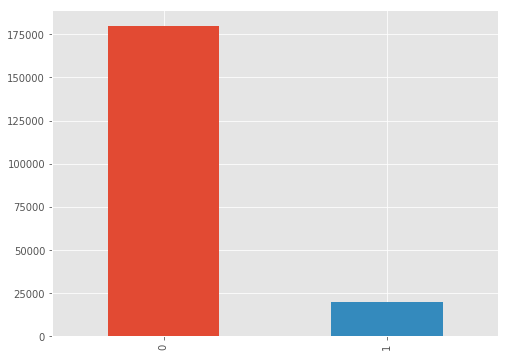

In [9]:
train['target'].value_counts().plot.bar();

**CountPlot**

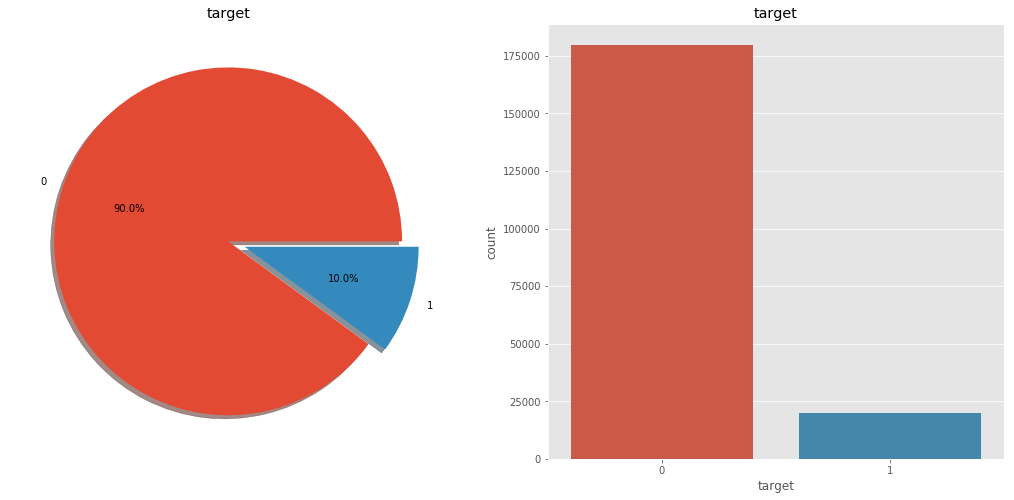

In [11]:
import seaborn as sns

f,ax=plt.subplots(1,2,figsize=(18,8))
train['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
ax[1].set_title('target')
plt.show()

In [14]:
y=train["target"]
train=train.drop("target",axis=1)

In [15]:
train=train.drop("ID_code",axis=1)
test=test.drop("ID_code",axis=1)

**Feature importance check**

In [16]:
train_X, val_X, train_y, val_y = train_test_split(train, y, random_state=1)
rfc_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc_model, random_state=1).fit(val_X, val_y)

/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [18]:
eli5.show_weights(perm, feature_names = val_X.columns.tolist(), top=150)

Weight,Feature
0.0003 ± 0.0001,var_21
0.0002 ± 0.0001,var_22
0.0002 ± 0.0002,var_81
0.0002 ± 0.0002,var_169
0.0002 ± 0.0002,var_26
0.0001 ± 0.0001,var_13
0.0001 ± 0.0001,var_174
0.0001 ± 0.0002,var_80
0.0001 ± 0.0000,var_150
0.0001 ± 0.0001,var_137


In [19]:
import lightgbm as lgb

#d_train=lgb.Dataset(chunk,label=target)
params = {'num_leaves': 32,
         'min_data_in_leaf': 30, 
         'objective':'binary',
         'max_depth': -1,
         'metric': 'auc',
         'learning_rate': 0.012,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.92,
         "bagging_seed": 11,
         
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         }

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.1,random_state=0)
d_train=lgb.Dataset(X_train,label=y_train)
test_data=lgb.Dataset(X_test,label=y_test)
clf=lgb.train(params,d_train,valid_sets=test_data,num_boost_round=3000,early_stopping_rounds=100)

[1]	valid_0's auc: 0.669871
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.682034
[3]	valid_0's auc: 0.690772
[4]	valid_0's auc: 0.701453
[5]	valid_0's auc: 0.701498
[6]	valid_0's auc: 0.706878
[7]	valid_0's auc: 0.707619
[8]	valid_0's auc: 0.708569
[9]	valid_0's auc: 0.70954
[10]	valid_0's auc: 0.710156
[11]	valid_0's auc: 0.71176
[12]	valid_0's auc: 0.713015
[13]	valid_0's auc: 0.714748
[14]	valid_0's auc: 0.715747
[15]	valid_0's auc: 0.718351
[16]	valid_0's auc: 0.719628
[17]	valid_0's auc: 0.720624
[18]	valid_0's auc: 0.721827
[19]	valid_0's auc: 0.722801
[20]	valid_0's auc: 0.723024
[21]	valid_0's auc: 0.724328
[22]	valid_0's auc: 0.72525
[23]	valid_0's auc: 0.727001
[24]	valid_0's auc: 0.727837
[25]	valid_0's auc: 0.729102
[26]	valid_0's auc: 0.729932
[27]	valid_0's auc: 0.731148
[28]	valid_0's auc: 0.732804
[29]	valid_0's auc: 0.733094
[30]	valid_0's auc: 0.733782
[31]	valid_0's auc: 0.734286
[32]	valid_0's auc: 0.735116
[33]	valid_0's auc: 0

[277]	valid_0's auc: 0.832369
[278]	valid_0's auc: 0.832611
[279]	valid_0's auc: 0.832791
[280]	valid_0's auc: 0.833076
[281]	valid_0's auc: 0.833243
[282]	valid_0's auc: 0.833435
[283]	valid_0's auc: 0.833657
[284]	valid_0's auc: 0.833793
[285]	valid_0's auc: 0.834063
[286]	valid_0's auc: 0.834156
[287]	valid_0's auc: 0.834305
[288]	valid_0's auc: 0.834425
[289]	valid_0's auc: 0.834557
[290]	valid_0's auc: 0.834658
[291]	valid_0's auc: 0.834876
[292]	valid_0's auc: 0.835018
[293]	valid_0's auc: 0.83511
[294]	valid_0's auc: 0.835365
[295]	valid_0's auc: 0.835476
[296]	valid_0's auc: 0.835624
[297]	valid_0's auc: 0.835839
[298]	valid_0's auc: 0.835907
[299]	valid_0's auc: 0.836
[300]	valid_0's auc: 0.836076
[301]	valid_0's auc: 0.836225
[302]	valid_0's auc: 0.836416
[303]	valid_0's auc: 0.836485
[304]	valid_0's auc: 0.836595
[305]	valid_0's auc: 0.836701
[306]	valid_0's auc: 0.83687
[307]	valid_0's auc: 0.836971
[308]	valid_0's auc: 0.837026
[309]	valid_0's auc: 0.837131
[310]	valid_0's

[553]	valid_0's auc: 0.858836
[554]	valid_0's auc: 0.858884
[555]	valid_0's auc: 0.858924
[556]	valid_0's auc: 0.85901
[557]	valid_0's auc: 0.859083
[558]	valid_0's auc: 0.859134
[559]	valid_0's auc: 0.859181
[560]	valid_0's auc: 0.85922
[561]	valid_0's auc: 0.859293
[562]	valid_0's auc: 0.859272
[563]	valid_0's auc: 0.859371
[564]	valid_0's auc: 0.859457
[565]	valid_0's auc: 0.859474
[566]	valid_0's auc: 0.859554
[567]	valid_0's auc: 0.8596
[568]	valid_0's auc: 0.859637
[569]	valid_0's auc: 0.859697
[570]	valid_0's auc: 0.85974
[571]	valid_0's auc: 0.859808
[572]	valid_0's auc: 0.859855
[573]	valid_0's auc: 0.859949
[574]	valid_0's auc: 0.859987
[575]	valid_0's auc: 0.860053
[576]	valid_0's auc: 0.860128
[577]	valid_0's auc: 0.860188
[578]	valid_0's auc: 0.860243
[579]	valid_0's auc: 0.860332
[580]	valid_0's auc: 0.860426
[581]	valid_0's auc: 0.860475
[582]	valid_0's auc: 0.860505
[583]	valid_0's auc: 0.860529
[584]	valid_0's auc: 0.860605
[585]	valid_0's auc: 0.860679
[586]	valid_0's

In [ ]:
y_pred=clf.predict(test,num_iteration=clf.best_iteration)

In [ ]:
submission=pd.read_csv("../input/sample_submission.csv")

In [ ]:
submission["target"]=y_pred

In [ ]:
submission.to_csv("santa1.csv",index=False)